# 预测instscart零售公司，用户二次购买产品

## 数据导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:

#path='../all/'
aisles=pd.read_csv('./all/aisles.csv')
departments=pd.read_csv('./all/departments.csv')
products=pd.read_csv('./all/products.csv')
orders=pd.read_csv('./all/orders.csv')
order_products_train=pd.read_csv('./all/order_products__train.csv')
order_products_prior=pd.read_csv('./all/order_products__prior.csv')



In [5]:
m1=aisles.memory_usage().sum()
m2=departments.memory_usage().sum()
m3=products.memory_usage().sum()
m4=orders.memory_usage().sum()
m5=order_products_train.memory_usage().sum()
m6=order_products_prior.memory_usage().sum()
print('total memory = %sbytes' % (m1+m2+m3+m4+m5+m6))

total memory = 1275385016bytes


## 数据探索

### aisles 数据集

aisles 为产品摆放位置说明  共有134个种类 无重复

In [19]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
aisles.shape

(134, 2)

In [21]:
aisles.nunique() # 返回不同值的数量

aisle_id    134
aisle       134
dtype: int64

### department 数据集

department 为产品种类说明 共有21个不同的产品种类

In [22]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [23]:
print(departments.shape)
print(departments.nunique())

(21, 2)
department_id    21
department       21
dtype: int64


### products 数据集

共49688 件商品 无重复  该表中还包括aisles和departments 的id

In [24]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [26]:
print(products.shape)
print(products.nunique())

(49688, 4)
product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64


### orders 数据集

eval_set是用来区分训练集&测试集&先验的,

In [27]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [29]:
print(orders.shape)
print(orders.nunique())

(3421083, 7)


order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64


orders 中共有3421083 条下单记录 无重复 ；206209个用户id，表示一个用户可能有多个下单记录；3种eval_set 区别训练集、测试集和先验。

days_since_prior_order 上次下单到现在经过的天数，有缺失；推测是由于是第一单 所以没有先前数据


In [32]:
orders[orders['days_since_prior_order'].isnull()].head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
50,2086598,6,prior,1,5,18,NaN
54,2565571,7,prior,1,3,9,NaN
75,600894,8,prior,1,6,0,NaN
79,280530,9,prior,1,1,17,NaN
83,1224907,10,prior,1,2,14,NaN


In [33]:
# 因为是第一单，所以不存在上一单。这个时候我们如果选择树模型 那么尽量不要填充缺失值  
# 或者填充为其他较大值值为好（因为不能填充的太小（比如-1） 这样模型就会认为距离购买时间较短）

In [35]:
orders[orders['order_number']==1].shape # 3. orders_number==1 的个数和user id 的

(206209, 7)

In [36]:
orders.groupby('user_id')['order_number'].min().sort_values(ascending=False)

user_id
206209    1
68732     1
68742     1
68741     1
68740     1
68739     1
68738     1
68737     1
68736     1
68735     1
68734     1
68733     1
68731     1
68769     1
68730     1
68729     1
68728     1
68727     1
68726     1
68725     1
68724     1
68723     1
68722     1
68721     1
68743     1
68744     1
68745     1
68746     1
68767     1
68766     1
         ..
137445    1
137444    1
137443    1
137442    1
137463    1
137465    1
137488    1
137466    1
137487    1
137486    1
137485    1
137484    1
137483    1
137482    1
137481    1
137480    1
137479    1
137478    1
137477    1
137476    1
137475    1
137474    1
137473    1
137472    1
137471    1
137470    1
137469    1
137468    1
137467    1
1         1
Name: order_number, Length: 206209, dtype: int64

orders_number==1 的个数和user id 的 个数相同 ，对应用户购买顺序 每一次购买都会对应一个不同的订单号

In [39]:
orders[['order_dow','order_hour_of_day']].describe()

,order_dow,order_hour_of_day
count,3.421083e+06,3.421083e+06
mean,2.776219e+00,1.345202e+01
std,2.046829e+00,4.226088e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+01
50%,3.000000e+00,1.300000e+01
75%,5.000000e+00,1.600000e+01
max,6.000000e+00,2.300000e+01


order_dow,order_hour_of_day  一周中的下单时间 一天中的下单时间

属于正常值，一周7天，一天24小时

In [40]:
orders['user_id'].value_counts()[:5]

53684     100
201623    100
50817     100
176951    100
88911     100
Name: user_id, dtype: int64

In [41]:
orders['user_id'].value_counts()[-5:]

24224     4
199509    4
32420     4
21310     4
196830    4
Name: user_id, dtype: int64

user_id 的重复次数 最多为100 最少为4  

查看user_id 次数分布 可以看到 次数最多的是四次 一次递减

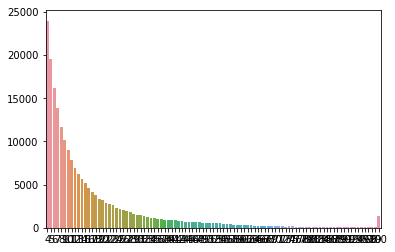

In [4]:
tmp=pd.DataFrame(orders['user_id'].value_counts().values,columns=['user_correspoding_samples'])  # 有重复的数值 比如说好多行100
tmp=tmp['user_correspoding_samples'].value_counts()
sns.barplot(x=tmp.index,y=tmp.values)

In [6]:
orders['eval_set'].value_counts() # 这一列值的统计

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [9]:
# eval_set 用来区分训练集 测试集 和先验， 其中需要预测的test 有75000 条
# 查看prior,train,test 中用户的交叉情况,因为用户在所有的腿甲推荐问题中都将是一个极为重要的特征变量

In [11]:
len(set(orders.loc[orders['eval_set']=='prior','user_id'])-set(orders.loc[orders['eval_set']=='train','user_id']))

75000

In [13]:
len(set(orders.loc[orders['eval_set']=='train','user_id']))

131209

In [14]:
# 训练集合中出现的用户在测试集中未出现，却全部出现在了prior中。
# 所以这部分用户在模型预测时，可能并不能带来增益，可以考虑删除。


In [18]:
len(set(orders.loc[orders['eval_set']=='train','user_id'])-set(orders.loc[orders['eval_set']=='test','user_id']))

131209

In [20]:
len(set(orders.loc[orders['eval_set']=='test','user_id'])-set(orders.loc[orders['eval_set']=='prior','user_id']))

0

所有的product_id 都出现在训练集合中，所以不存在任何奇异值的情况

In [25]:
set(order_products_prior['product_id'].values)-set(products['product_id'].values)

set()